# Code for Implementing a Global NeuralProphet Model

**Need to revisit this notebook when the package is more mature.**

***
***

The repository and documentation for `NeuralProphet` can be found [here](https://github.com/ourownstory/neural_prophet) and [here](https://neuralprophet.com/html/contents.html).

This file is based on code from a [tutorial](https://neuralprophet.com/html/global_modeling.html) on implementing a global model in NeuralProphet.

In [1]:
import pandas as pd
import numpy as np

from neuralprophet import NeuralProphet, set_log_level, set_random_seed

In [2]:
data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"
df_ercot = pd.read_csv(data_location + "energy/price_ercot_dam.csv")
df_ercot.head()

,ds,y,temp_celsius_houston
0,2015-01-01 00:00:00,22.01,7.96
1,2015-01-01 01:00:00,21.39,7.45
2,2015-01-01 02:00:00,21.00,7.10
3,2015-01-01 03:00:00,20.72,7.05
4,2015-01-01 04:00:00,21.18,6.60


In [3]:
regions = list(df_ercot)[1:]

In [4]:
regions

['y', 'temp_celsius_houston']

In [5]:
df_list = list()
df_dict = {}
for col in regions:
    aux = df_ercot[['ds', col]].copy() #select column associated with region
    aux = aux.rename(columns = {col: 'y'}) #rename column of data to 'y' which is compatible with Neural Prophet
    df_list.append(aux)
    df_dict[col] = aux

In [12]:
m = NeuralProphet()

In [14]:
df_train_dict, df_test_dict = m.split_df(df_dict, valid_p = 0.33, local_split = True)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.996% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.996% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as H


In [15]:
m = NeuralProphet(global_normalization = True)
metrics = m.fit(df_train_dict)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.994% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.994% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as H
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 20


  0%|          | 0/326 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.46E-02, min: 1.80E+00


  0%|          | 0/326 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.18E-02, min: 2.18E+00


  0%|          | 0/326 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.46E-02, min: 1.49E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.37E-02
Epoch[20/20]: 100%|███████████████| 20/20 [00:20<00:00,  1.03s/it, SmoothL1Loss=0.0323, MAE=5.82, RMSE=11.1, RegLoss=0]


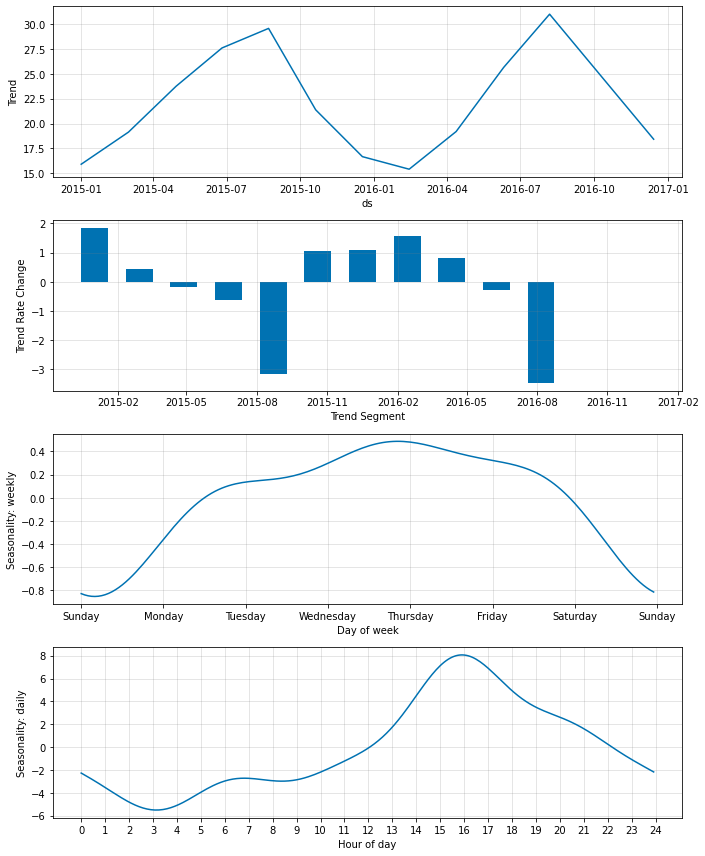

In [16]:
fig_param = m.plot_parameters()

In [17]:
test_metrics = m.test(df_test_dict)
test_metrics

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.260 24.957 27.051


,SmoothL1Loss,MAE,RMSE
0,0.259966,24.956714,27.05116


INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.988%

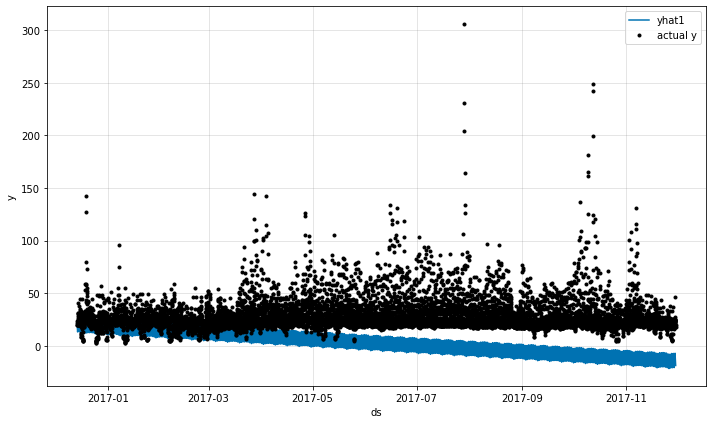

In [18]:
future = m.make_future_dataframe(df_test_dict, n_historic_predictions = True)
forecast = m.predict(future)
fig = m.plot(forecast['y'])

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.988%

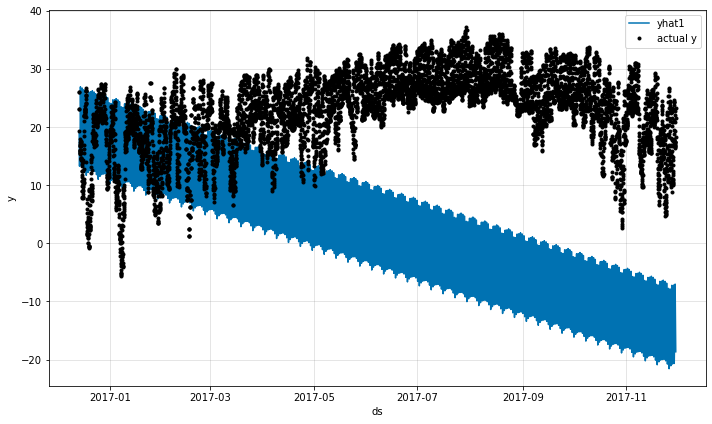

In [20]:
future = m.make_future_dataframe(df_test_dict, n_historic_predictions = True)
forecast = m.predict(future)
fig = m.plot(forecast['temp_celsius_houston'])

***

## Step 1: Import Modules and Data

In [ ]:
set_log_level("ERROR", "INFO")

In [ ]:
# import weekly finance time series
Y = pd.read_csv("../../../Data/Train/Clean/weekly_finance_clean.csv")

# import M4 info and store the starting data of each series
m4_info = pd.read_csv("../../../Data/M4-info.csv")
start_dates = m4_info.loc[(m4_info.SP == "Weekly") & (m4_info.category == "Finance"), "StartingDate"]

In [ ]:
# store the number of series and number of time periods
num_series, num_periods = Y.shape

In [ ]:
# calculate mean of each series
series_means = Y.mean(axis=1)

In [ ]:
# normalize each series by the mean and log-transform
Y_t = np.log(Y.divide(series_means, axis=0))

In [ ]:
# store DateTime index for first series
y_index = pd.date_range(start=start_dates.iloc[0], periods=num_periods, freq="W")

***

We're going to start by converting each series (row) in `Y_t` into a dataframe as needed for `neural_prophet`. The dataframes for each series will be stored together in a list and a dictionary for later reference.

In [ ]:
# Do I need this?
#regions = list(df_ercot)[1:-1]

In [ ]:
df_list = list()
df_dict = {}
for i in range(num_series):
    # copy series i
    y = Y_t.iloc[i,:].copy()
    
    # set series index to DateTime of first series (using as common index for now)
    y.index = y_index
    
    # convert to dataframe and rename columns appropriately
    y = y.reset_index().rename(columns={'index':'ds', i:'y'})
    
    # store new dataframe in list and dictionary
    df_list.append(y)
    df_dict[i] = y

Instantiate model. Split into train and test to start out.

In [ ]:
m = NeuralProphet()

In [ ]:
train_dict, test_dict = m.split_df(df_dict, freq="W", valid_p = 0.20, local_modeling=False)

In [ ]:
df_dict